# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [3]:
import pandas as pd
import numpy as np

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1 > 10] = 10
p1[p1 < 0] = 0

p2 = p1 + np.random.normal(0, 1, 50)
p2[p2 > 10] = 10
p2[p2 < 0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

# a) 
transformation_matrix = np.array([[0.5, 0.5], [0.5, -0.5]])
data = np.array([df['p1'], df['p2']])
transformed_data = transformation_matrix @ data
df['mean'] = transformed_data[0]
df['diff'] = transformed_data[1]

# b) 
correlation_p1_p2 = df['p1'].corr(df['p2'])
print(f"Correlação entre p1 e p2: {correlation_p1_p2:.4f}")

# c) 
correlation_mean_diff = df['mean'].corr(df['diff'])
print(f"Correlação entre média e diferença: {correlation_mean_diff:.4f}")

# d):
# as correlações observadas mostram que p1 e p2 têm uma correlação alta,
# enquanto as variáveis transformadas (mean e diff) apresentam correlação próxima de zero,
# indicando que a transformação remove a dependência linear entre as variáveis.


Correlação entre p1 e p2: 0.8957
Correlação entre média e diferença: -0.1335


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

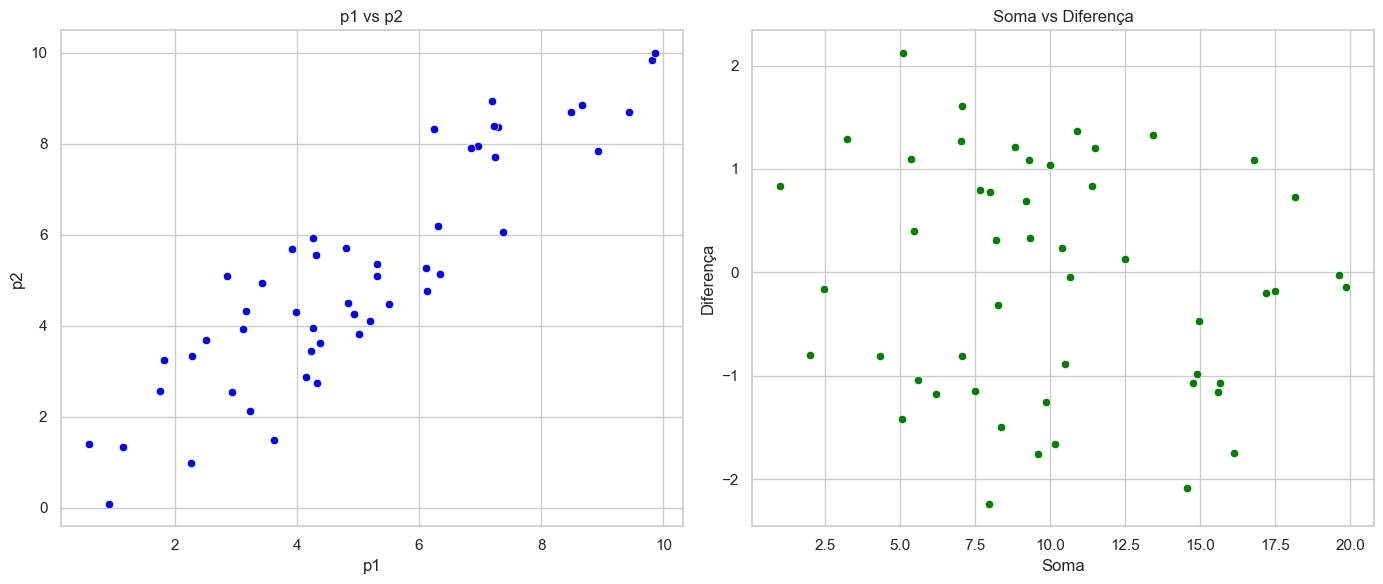

In [4]:

sum_diff_matrix = np.array([[1, 1], [1, -1]])


sum_diff_data = sum_diff_matrix @ data

df['sum'] = sum_diff_data[0]
df['diff'] = sum_diff_data[1]


import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='p1', y='p2', data=df, color='blue')
plt.title('p1 vs p2')
plt.xlabel('p1')
plt.ylabel('p2')


plt.subplot(1, 2, 2)
sns.scatterplot(x='sum', y='diff', data=df, color='green')
plt.title('Soma vs Diferença')
plt.xlabel('Soma')
plt.ylabel('Diferença')

plt.tight_layout()
plt.show()
